# TP2



In [3]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt # pip install PyQt5

In [4]:
# funciones auxiliares
def fft2_mod(image):

  shifted_image_fft = np.fft.fftshift(np.fft.fft2(image))
  return 20*np.log(np.abs(shifted_image_fft))


def _filter_round_shape(height, width, radius):
  canvas = np.zeros((height, width))
  return cv.circle(canvas,
                     center=(int(canvas.shape[1]/2), int(canvas.shape[0]/2)),
                     radius=radius,
                     color=(255),
                     thickness=-1).astype(np.uint8)


def create_filter(height, width, radius=20):
  lp_filter = _filter_round_shape(height, width, radius)
  return lp_filter


In [12]:
def create_gauss_filter (h, w, k_size, sigma):
    nucleo_g = cv.getGaussianKernel(k_size, sigma)
    kernel = nucleo_g * nucleo_g.T
    #kernel_tf = np.fft.fft2(kernel)
    kernel = create_filter(h, w, radius=40)
    kernel_tf = np.fft.fft2(kernel)

    return kernel, kernel_tf

In [55]:
def create_gauss_filter(h, w, k_size, sigma):
    # Crear un kernel gaussiano en el dominio espacial
    kernel = cv.getGaussianKernel(k_size, sigma)
    
    # Expandir el kernel a 2D
    kernel_2d = np.outer(kernel, kernel.T)
    
    # Calcula la cantidad de píxeles que se deben agregar tanto en la parte superior como en la parte inferior del kernel
    pad_h = (h - k_size) // 2
    # Si la diferencia entre h y k_size es impar, agrega un píxel adicional en la parte inferior para mantener la simetría
    if (h - k_size) % 2 != 0:
        pad_h_bottom = pad_h + 1
    else:
        pad_h_bottom = pad_h

    # Calcula la cantidad de píxeles que se deben agregar tanto en el lado izquierdo como en el lado derecho del kernel
    pad_w = (w - k_size) // 2
    # Si la diferencia entre w y k_size es impar, agrega un píxel adicional en el lado derecho para mantener la simetría
    if (w - k_size) % 2 != 0:
        pad_w_right = pad_w + 1
    else:
        pad_w_right = pad_w

    # Realiza el relleno con las cantidades calculadas
    gauss_filter = np.pad(kernel_2d, ((pad_h, pad_h_bottom), (pad_w, pad_w_right)), 'constant')

    
    # Calcular la transformada de Fourier del filtro gaussiano
    gauss_filter_fft = np.fft.fft2(gauss_filter)
    print(gauss_filter.shape)
    print(gauss_filter_fft.shape)
    return gauss_filter, gauss_filter_fft

(<Axes: >, <matplotlib.image.AxesImage at 0x1c4900d1f90>)

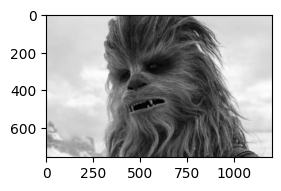

In [19]:
img = cv.imread('chewbacca.jpg', cv.IMREAD_GRAYSCALE)
plt.figure()
plt.subplot(121),plt.imshow(img,cmap = 'gray')

(756, 1200)
(756, 1200)


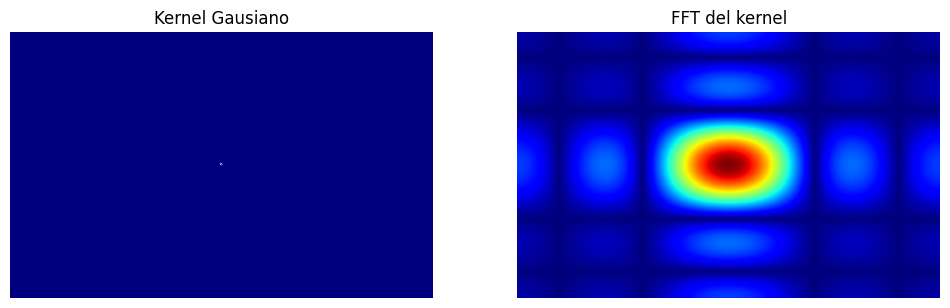

In [76]:
h, w = img.shape
kernel, kernel_tf = create_gauss_filter(h, w, k_size=5, sigma=5)

plt.figure(figsize=(12,12))
plt.subplot(1,2,1)
plt.axis('off')
plt.title("Kernel Gausiano")
plt.imshow(kernel, cmap='jet')
plt.subplot(1,2,2)
plt.axis('off')
plt.title("FFT del kernel")
tf_shifted = np.fft.fftshift(kernel_tf)
plt.imshow(np.abs(tf_shifted), cmap='jet')

Text(0.5, 1.0, 'Desenfoque gausiano')

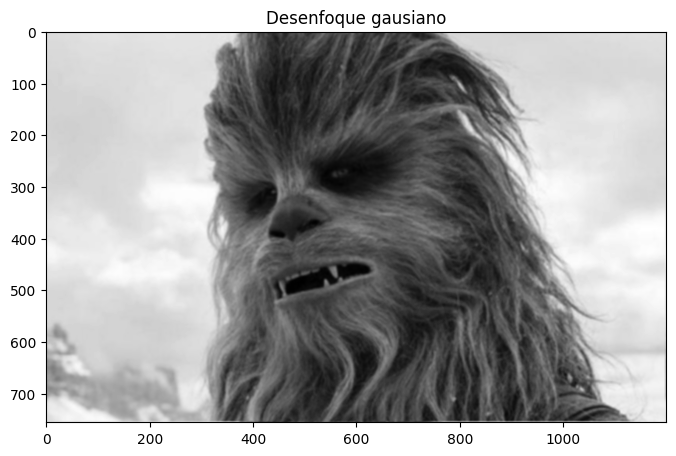

In [77]:
img_fft = np.fft.fft2(img)
filtered = img_fft * kernel_tf

img_gauss = np.fft.ifftshift(np.real(np.fft.ifft2(filtered)))

plt.figure(figsize=(8,8))
plt.imshow(img_gauss, cmap='gray')
plt.title('Desenfoque gausiano')

(756, 1200)
(756, 1200)


Text(0.5, 1.0, 'Desenfoque gausiano')

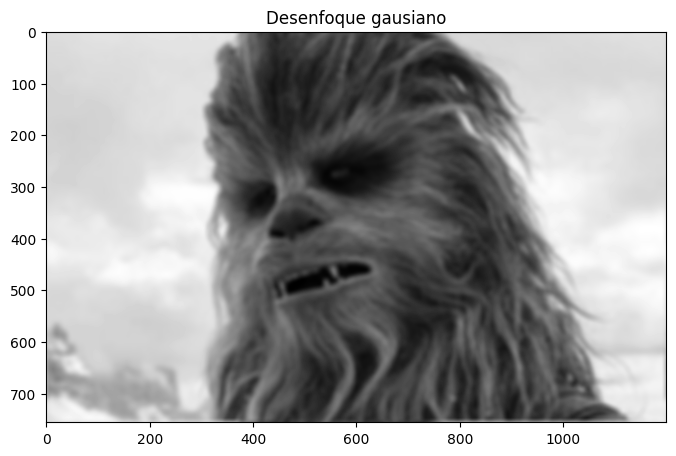

In [78]:
k_size=15
sigma=5
kernel, kernel_tf = create_gauss_filter(h, w, k_size, sigma)
filtered = img_fft * kernel_tf

img_gauss = np.fft.ifftshift(np.real(np.fft.ifft2(filtered)))

plt.figure(figsize=(8,8))
plt.imshow(img_gauss, cmap='gray')
plt.title('Desenfoque gausiano')

(756, 1200)
(756, 1200)


Text(0.5, 1.0, 'Desenfoque gausiano')

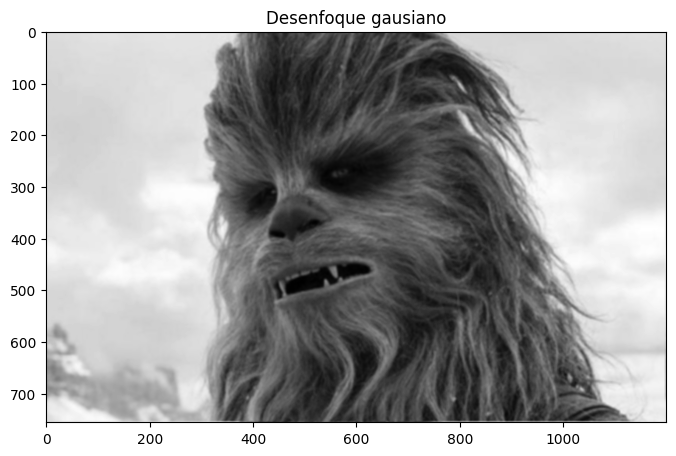

In [79]:
k_size=5
sigma=20
kernel, kernel_tf = create_gauss_filter(h, w, k_size, sigma)
filtered = img_fft * kernel_tf

img_gauss = np.fft.ifftshift(np.real(np.fft.ifft2(filtered)))

plt.figure(figsize=(8,8))
plt.imshow(img_gauss, cmap='gray')
plt.title('Desenfoque gausiano')

**2**

In [51]:
M, N = img.shape
F = np.fft.fft2(img)
Fc = np.fft.ifftshift(np.real(F))
AF = np.abs(Fc)
M = np.max(AF)
thres= M/1000
Th=np.where()
FM=(Th/(M*N))

TypeError: where() missing 1 required positional argument: 'condition'